## Importamos las librerias necesarias

In [11]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os

In [ ]:
from sklearn.preprocessing import MinMaxScaler

## Manejo de archivos simplificado

In [3]:
# Manejo simplificado de archivos
files = os.listdir('./Complementary/')
files = [ file for file in files if not(file.endswith('.pdf'))  ]
dict_files = {'df{}'.format(i+1): file for i, file in enumerate(files)}

In [4]:
dict_files

{'df1': 'air_quality_data.csv',
 'df2': 'car_noise.csv',
 'df3': 'fuel_consumption_ratings',
 'df4': 'yellow_taxis'}

In [ ]:
# Alternativamente es posible leer cada archivo por separado por ejemplo:
# df = pd.read_csv("./Complementary/air_quality_data.csv")

### Se abrirán los archivos relacionados en tema vehiculos, según el DER y se normalizaran datos y nombres de columnas, a modo de obtener los datos coherentes  y congruentes entres si.

_____________________________________________________

## Archivo 'air_quality_data.csv'

In [5]:
dict_files['df1']

'air_quality_data.csv'

In [27]:
df1 = pd.read_csv('./Complementary/' + dict_files['df1']) 
df1.head()

,aqi,dt,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,5,2020/11/24,1815.80,211.00,79.51,0.0,7.87,63.81,90.35,14.06
1,5,2020/11/24,2056.12,239.61,80.20,0.0,8.35,77.15,110.21,15.07
2,5,2020/11/24,2189.64,257.49,79.51,0.0,8.94,86.94,126.06,16.47
3,5,2020/11/24,2349.85,278.95,80.88,0.0,9.30,96.19,141.36,15.58
4,5,2020/11/25,2109.53,246.76,76.08,0.0,7.99,83.11,129.25,9.12


#### **Análisis de las variables del dataset**

- 'aqi': El Índice de Calidad del Aire (ICA) es un número que se utiliza para comunicar la calidad general del aire a la población. Puede ser calculado de diferentes maneras, generalmente en función de los niveles de varios contaminantes del aire.


- 'dt': Esta es la fecha en que se registraron las mediciones de calidad del aire.


- 'co': Monóxido de carbono (CO) es un gas incoloro e inodoro que puede ser perjudicial para la salud humana en altas concentraciones. Se deriva principalmente de la combustión incompleta de carbono en motores de automóviles y otras fuentes.


- 'no': Óxido nítrico (NO) es un gas producido principalmente por la quema de combustibles fósiles. Puede contribuir a la formación de smog y al deterioro de la calidad del aire.


- 'no2': Dióxido de nitrógeno (NO2) es otro gas relacionado con la quema de combustibles fósiles. Puede causar problemas respiratorios y contribuir a la formación de smog.


- 'o3': Ozono (O3) en la troposfera es un contaminante del aire que puede ser perjudicial para la salud. Se forma a partir de reacciones químicas entre óxidos de nitrógeno y compuestos orgánicos volátiles en presencia de la luz solar.


- 'so2': Dióxido de azufre (SO2) es un gas que se produce por la quema de combustibles fósiles, especialmente en plantas de energía y procesos industriales. Puede tener efectos negativos en la salud y el medio ambiente.


- 'pm2_5': Partículas finas (PM2.5) son partículas suspendidas en el aire que tienen un diámetro de 2.5 micrómetros o menos. Pueden penetrar profundamente en los pulmones y estar relacionadas con problemas de salud respiratoria.


- 'pm10': Partículas en suspensión (PM10) son partículas con un diámetro de 10 micrómetros o menos. Aunque son más grandes que las PM2.5, aún pueden tener efectos negativos en la salud.


- 'nh3': Amoníaco (NH3) es un gas que puede provenir de fuentes agrícolas y de la industria. Puede contribuir a la formación de partículas y afectar la calidad del aire.

In [16]:
df1.columns

Index(['aqi', 'dt', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3'], dtype='object')

<Axes: >

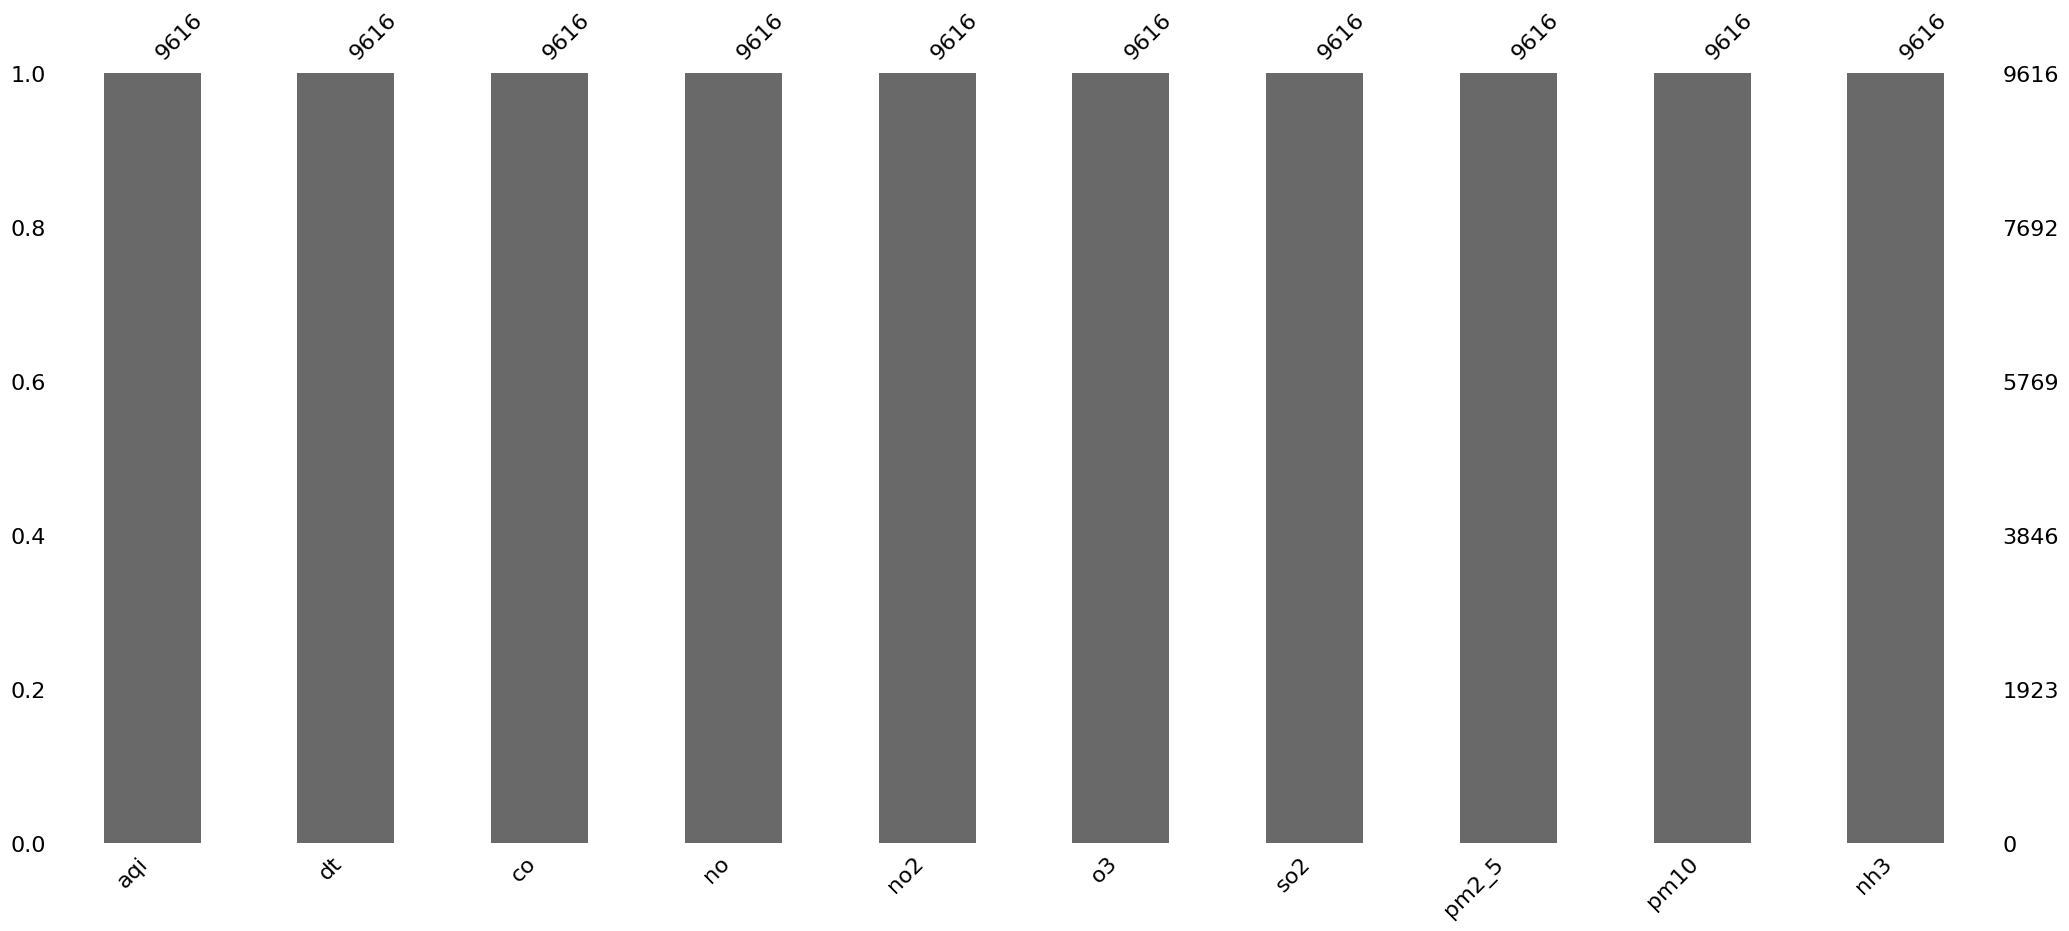

In [17]:
msno.bar(df1)

En este caso no se cuenta con columnas sin valores. 

In [28]:
# Convertir la columna 'dt' a objetos de fecha
df1['dt'] = pd.to_datetime(df1['dt'])

# Extraer los años de la columna 'dt' (nueva columna "year")
df1['year'] = df1['dt'].dt.year

# Hallar el mínimo y el máximo de años
min_year = df1['year'].min()
max_year = df1['year'].max()

# Resultados
print(f"Año mínimo: {min_year}")
print(f"Año máximo: {max_year}")

Año mínimo: 2020
Año máximo: 2021


Los registros de este archivo corresponden a los años 2020 a 2021

In [29]:
# Seleccionar solo las columnas numéricas para la normalización
numeric_columns = ['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
df_numeric = df1[numeric_columns]

# Crear un objeto MinMaxScaler para la normalización
scaler = MinMaxScaler()

# Aplicar la normalización a los datos
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# Mostrar el DataFrame normalizado
print(df_normalized)

      aqi        co        no       no2        o3       so2     pm2_5  \
0     1.0  0.399675  0.359755  0.404429  0.000000  0.097842  0.191697   
1     1.0  0.458402  0.408535  0.408084  0.000000  0.104748  0.232090   
2     1.0  0.491029  0.439021  0.404429  0.000000  0.113237  0.261733   
3     1.0  0.530179  0.475610  0.411687  0.000000  0.118417  0.289741   
4     1.0  0.471453  0.420726  0.386258  0.000000  0.099568  0.250136   
...   ...       ...       ...       ...       ...       ...       ...   
9611  1.0  0.298532  0.253056  0.241047  0.000000  0.106331  0.206292   
9612  1.0  0.484502  0.457315  0.288250  0.000000  0.137266  0.345213   
9613  1.0  0.601959  0.603656  0.320937  0.000025  0.174964  0.433053   
9614  1.0  0.556282  0.567066  0.317281  0.000098  0.255683  0.399080   
9615  1.0  0.275694  0.265247  0.306421  0.000320  0.471799  0.189850   

          pm10       nh3  
0     0.228965  0.213364  
1     0.279664  0.228702  
2     0.320127  0.249962  
3     0.359185 

In [26]:
from sklearn.preprocessing import MinMaxScaler

# Crear una nueva columna para la normalización
df1['normalized_dt'] = pd.to_datetime(df1['dt']).sub(pd.Timestamp('2000-01-01')).dt.days

# Crear un objeto MinMaxScaler para la normalización
scaler = MinMaxScaler()

# Normalizar la columna 'normalized_dt'
df1['normalized_dt'] = scaler.fit_transform(df1[['normalized_dt']])

# Mostrar el DataFrame con la columna normalizada
print(df1)

      aqi         dt        co        no       no2        o3       so2  \
0     1.0 2020-11-24  0.399675  0.359755  0.404429  0.000000  0.097842   
1     1.0 2020-11-24  0.458402  0.408535  0.408084  0.000000  0.104748   
2     1.0 2020-11-24  0.491029  0.439021  0.404429  0.000000  0.113237   
3     1.0 2020-11-24  0.530179  0.475610  0.411687  0.000000  0.118417   
4     1.0 2020-11-25  0.471453  0.420726  0.386258  0.000000  0.099568   
...   ...        ...       ...       ...       ...       ...       ...   
9611  1.0 2021-12-31  0.298532  0.253056  0.241047  0.000000  0.106331   
9612  1.0 2021-12-31  0.484502  0.457315  0.288250  0.000000  0.137266   
9613  1.0 2021-12-31  0.601959  0.603656  0.320937  0.000025  0.174964   
9614  1.0 2021-12-31  0.556282  0.567066  0.317281  0.000098  0.255683   
9615  1.0 2021-12-31  0.275694  0.265247  0.306421  0.000320  0.471799   

         pm2_5      pm10       nh3  normalized_dt  year  
0     0.191697  0.228965  0.213364           7633  20

In [25]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9616 entries, 0 to 9615
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   aqi            9616 non-null   float64       
 1   dt             9616 non-null   datetime64[ns]
 2   co             9616 non-null   float64       
 3   no             9616 non-null   float64       
 4   no2            9616 non-null   float64       
 5   o3             9616 non-null   float64       
 6   so2            9616 non-null   float64       
 7   pm2_5          9616 non-null   float64       
 8   pm10           9616 non-null   float64       
 9   nh3            9616 non-null   float64       
 10  normalized_dt  9616 non-null   float64       
 11  year           9616 non-null   int32         
dtypes: datetime64[ns](1), float64(10), int32(1)
memory usage: 864.1 KB


In [18]:
from sklearn.preprocessing import MinMaxScaler

# Supongamos que tienes df1 definido con las columnas mencionadas

# Seleccionar solo las columnas numéricas para la normalización
numeric_columns = ['aqi', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
df_numeric = df1[numeric_columns]

# Crear un objeto MinMaxScaler para la normalización
scaler = MinMaxScaler()

# Aplicar la normalización a los datos
df_normalized = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_columns)

# Mostrar el DataFrame normalizado
print(df_normalized)

      aqi        co        no       no2        o3       so2     pm2_5  \
0     1.0  0.399675  0.359755  0.404429  0.000000  0.097842  0.191697   
1     1.0  0.458402  0.408535  0.408084  0.000000  0.104748  0.232090   
2     1.0  0.491029  0.439021  0.404429  0.000000  0.113237  0.261733   
3     1.0  0.530179  0.475610  0.411687  0.000000  0.118417  0.289741   
4     1.0  0.471453  0.420726  0.386258  0.000000  0.099568  0.250136   
...   ...       ...       ...       ...       ...       ...       ...   
9611  1.0  0.298532  0.253056  0.241047  0.000000  0.106331  0.206292   
9612  1.0  0.484502  0.457315  0.288250  0.000000  0.137266  0.345213   
9613  1.0  0.601959  0.603656  0.320937  0.000025  0.174964  0.433053   
9614  1.0  0.556282  0.567066  0.317281  0.000098  0.255683  0.399080   
9615  1.0  0.275694  0.265247  0.306421  0.000320  0.471799  0.189850   

          pm10       nh3  
0     0.228965  0.213364  
1     0.279664  0.228702  
2     0.320127  0.249962  
3     0.359185 

In [14]:
# Nombres de las columnas
column_names = ['aqi', 'dt', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Crear un DataFrame con columnas vacías
df1 = pd.DataFrame(columns=column_names)

# Mostrar el DataFrame
print(df1)

Empty DataFrame
Columns: [aqi, dt, co, no, no2, o3, so2, pm2_5, pm10, nh3]
Index: []


Min-Max Scaling: Escala los valores de las características para que estén dentro de un rango específico, generalmente entre 0 y 1. Esto se logra restando el valor mínimo y dividiendo por el rango (diferencia entre el valor máximo y el valor mínimo).

Z-Score (Standardization): Transforma los valores de las características para que tengan una media de 0 y una desviación estándar de 1. Esto se logra restando la media y dividiendo por la desviación estándar.

Robust Scaling: Similar al Min-Max Scaling, pero utiliza estadísticas resistentes a valores atípicos, como la mediana y el rango intercuartil, en lugar de la media y la desviación estándar.

Max Abs Scaling: Escala los valores dividiendo por el valor absoluto máximo. Esto puede ser útil cuando los datos tienen valores muy grandes.

Unit Vector Scaling: También conocido como Normalización L2, escala los valores de manera que la norma (longitud) del vector de características sea igual a 1. Es útil cuando las magnitudes absolutas de los valores no son tan importantes como las direcciones relativas de las características.

### Archivo 'air_quality_data.csv'

### Archivos 'yellow_taxis' (parquet)

### Archivo 'car_noise.csv'